In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cleaned_final_dataset (1).csv')  # Replace with the actual dataset path

# Select features for clustering
features = ['AvgTemperature', 'Happiness Index', 'GDP', 'Population']  # Example columns
clustering_data = data[features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

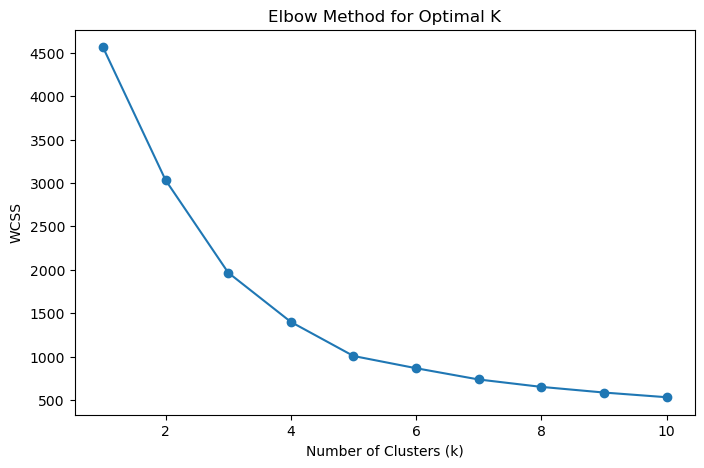

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal k (e.g., 3 based on the Elbow plot)
optimal_k = 3

In [21]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters
print("K-Means clustering applied.")

K-Means clustering applied.


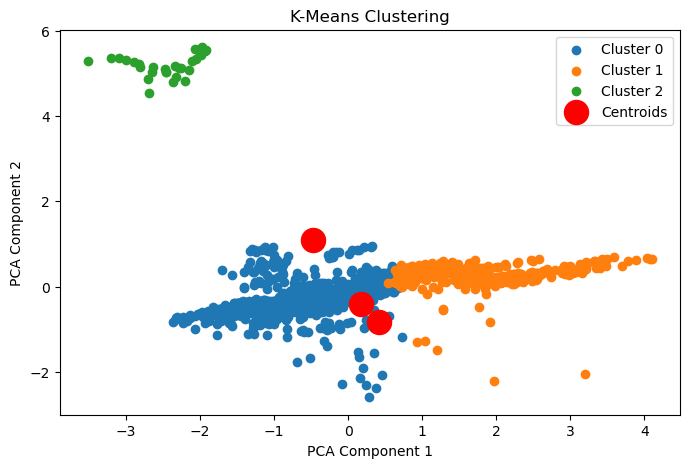

In [22]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    plt.scatter(
        pca_data[clusters == cluster, 0],
        pca_data[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [23]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4735238605547776


         AvgTemperature  Happiness Index           GDP    Population
Cluster                                                             
0             65.208283         5.225224   6198.307804  3.443158e+07
1             52.229438         7.000892  47687.513288  2.596324e+07
2             70.179450         4.744527   3683.246839  1.314031e+09


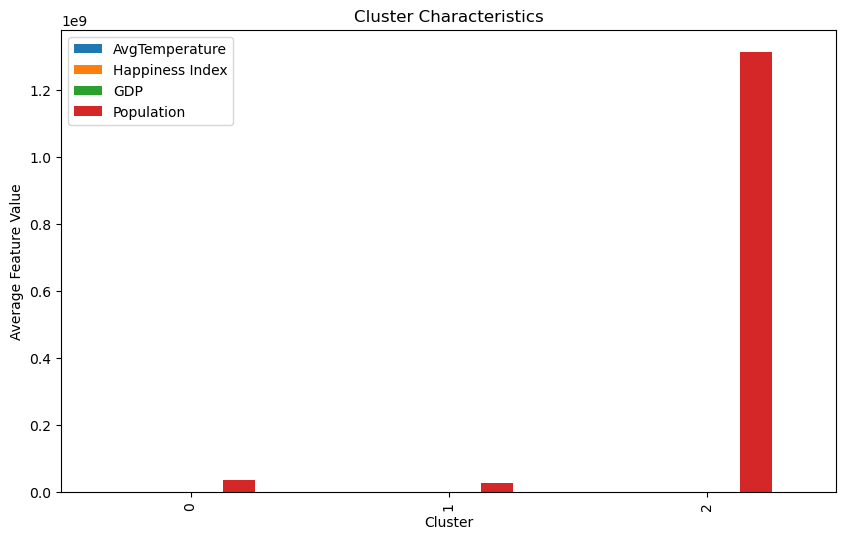

In [24]:
# Analyze clusters
cluster_analysis = data.groupby('Cluster')[features].mean()
print(cluster_analysis)

# Plot cluster characteristics
cluster_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Characteristics')
plt.ylabel('Average Feature Value')
plt.xlabel('Cluster')
plt.legend(loc='best')
plt.show()

**KNN CLASSIFIER MODEL**

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       115
           1       0.96      0.96      0.96       114

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



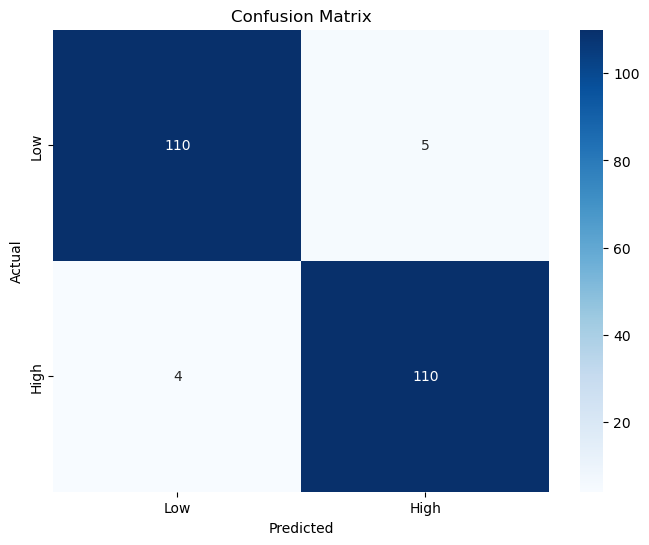

In [26]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
data = pd.read_csv("cleaned_final_dataset (1).csv")

# Create a target column by categorizing 'Both sexes' into High/Low based on the median
data['SuicideRate_Category'] = (data['Both sexes'] > data['Both sexes'].median()).astype(int)

# Features and Target
features = ['AvgTemperature', 'Happiness Index', 'GDP', 'Population']
target = 'SuicideRate_Category'

# Encode categorical variables
encoder = LabelEncoder()
data['Region_Encoded'] = encoder.fit_transform(data['Region'])
data['Country_Encoded'] = encoder.fit_transform(data['Country'])

# Add encoded features to the feature set
features.extend(['Region_Encoded', 'Country_Encoded'])

# Define X (features) and y (target)
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate and display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**GRAPHS**

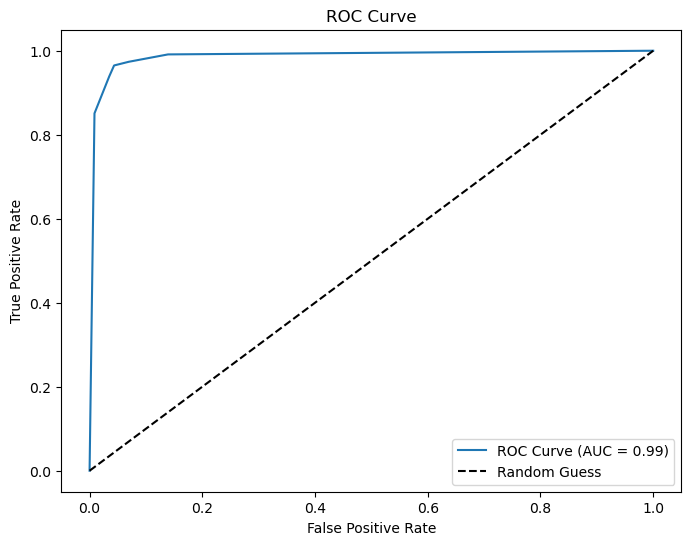

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
y_prob = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**ROC Curve**
Purpose: The ROC curve evaluates the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1-Specificity) at different thresholds.

Conclusion:
The Area Under Curve (AUC) is 0.99, which indicates an excellent classification ability of the KNN model.

The model is able to distinguish between the classes effectively, which is critical in a task like suicide prediction where minimizing false negatives is crucial.

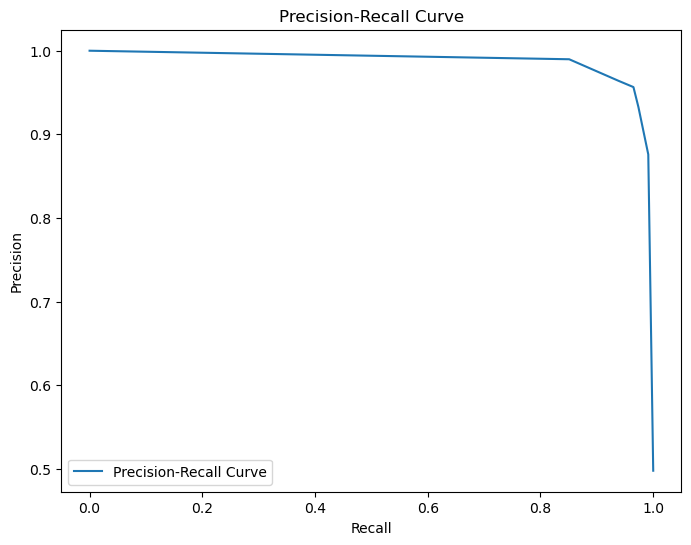

In [28]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**Precision-Recall Curve**

Purpose: This curve illustrates the trade-off between Precision and Recall for different thresholds.

Conclusion:
The curve remains high for most values, indicating that the model maintains a good balance between precision and recall.

This is vital for ensuring that the model accurately identifies suicide risk without producing excessive false positives.

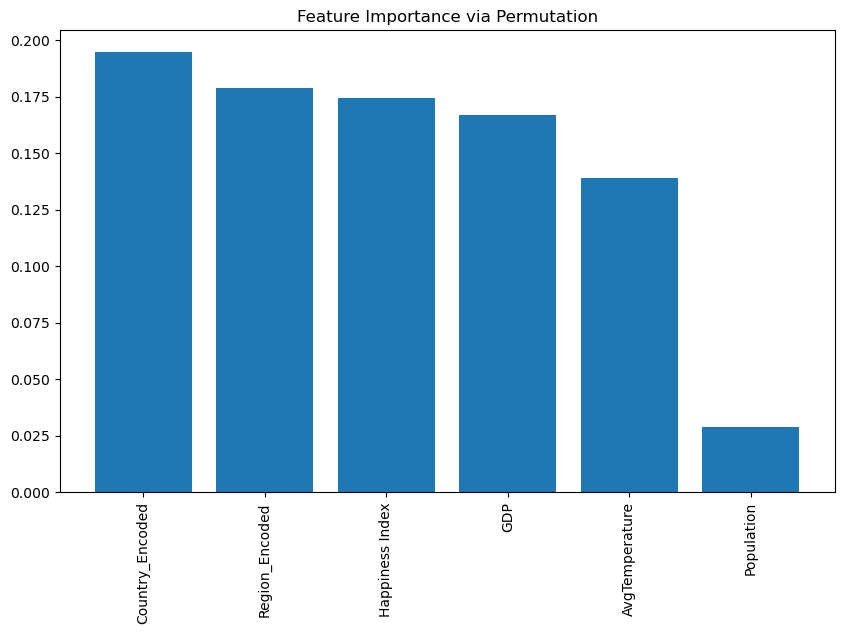

In [29]:
from sklearn.inspection import permutation_importance

# Calculate feature importance via permutation importance
perm_importance = permutation_importance(knn_model, X_test, y_test, scoring='accuracy')

# Plot Feature Importance
feature_names = X.columns
importances = perm_importance.importances_mean
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importance via Permutation")
plt.show()

**Feature Importance via Permutation**

Purpose: Identifies the most important features affecting the predictions by observing the drop in model performance when a feature's values are shuffled.

Conclusion:
Features such as Country_Encoded, Region_Encoded, and Happiness Index are highly significant in predicting suicide rates.

Population is shown to have the least impact, suggesting that its predictive power is relatively low compared to other features.

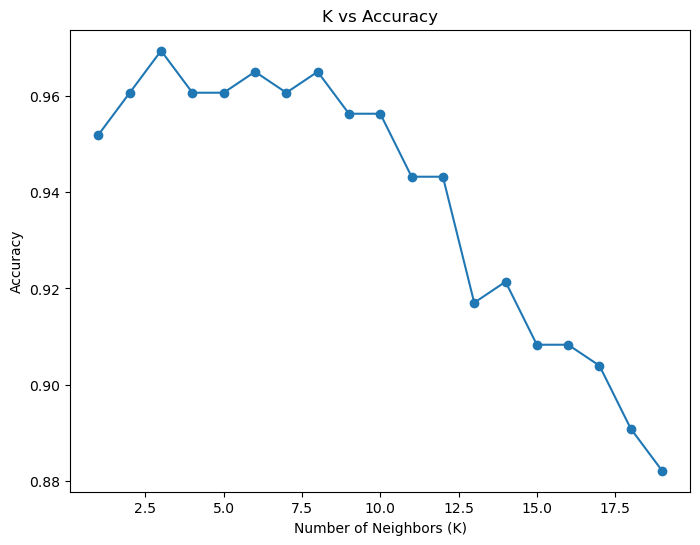

In [30]:
accuracies = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

**K vs Accuracy**

Purpose: Evaluates the impact of the number of neighbors (k) on the model's accuracy.

Conclusion:
The optimal value of k is around 3, as accuracy is highest at this point.

As k increases, the accuracy decreases, showing the need for tuning this hyperparameter to find the optimal value for the dataset.

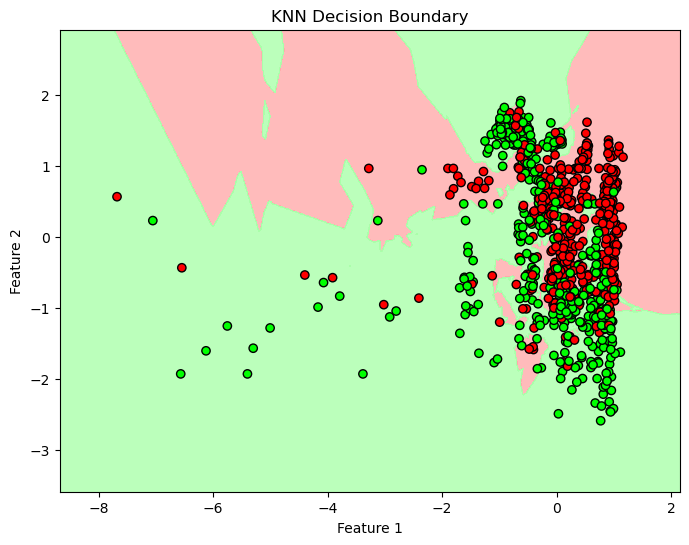

In [31]:
from matplotlib.colors import ListedColormap
import numpy as np

# Select first two features for visualization
X_vis = X_train[:, :2]
y_vis = y_train

# Mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_vis, y_vis)

# Predict for mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()

**KNN Decision Boundary**

Purpose: Visualizes how the KNN model divides the feature space into regions corresponding to different classes

Conclusion:
The decision boundary shows that KNN effectively separates the two classes (0 and 1) using the input features.

Overlapping regions indicate the challenge of predicting certain samples, emphasizing the importance of feature selection and scaling.

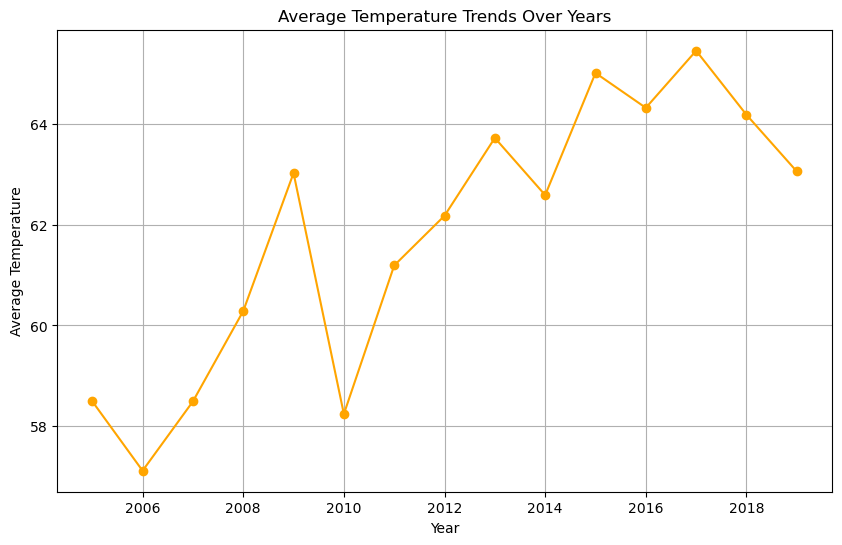

In [33]:
# Aggregate AvgTemperature by Year
temperature_trends = data.groupby('Year')['AvgTemperature'].mean()

# Plot
plt.figure(figsize=(10, 6))
temperature_trends.plot(kind='line', marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Trends Over Years')
plt.grid()
plt.show()

**Average Temperature Trends Over Years**

Purpose: Visualizes the trend of average temperature over the years.

Conclusion:
The upward trend in average temperature suggests potential climate-related stress factors contributing to suicide rates.

**FINE TUNE MODEL**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Improved Accuracy: 0.9737991266375546
Improved Precision: 0.9739457086775235
Improved Recall: 0.9737991266375546
Improved F1 Score: 0.973798127367022

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.97      0.98      0.97       114

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



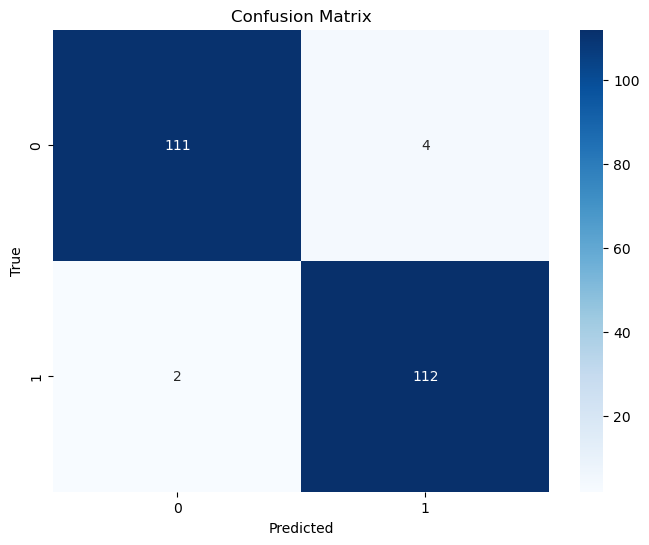

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Step 2: Define the parameter grid for fine-tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Step 3: Perform Grid Search CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Step 4: Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and train the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 6: Predict on test data
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the improved model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Improved Accuracy: {accuracy}")
print(f"Improved Precision: {precision}")
print(f"Improved Recall: {recall}")
print(f"Improved F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()